In [58]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D


In [34]:
df = pd.read_csv('50k-posts-from-relationship-advice.csv')
df = df.drop([15981,9988,42649,43042])

In [12]:
df.head(2)

,age_partner,age,id,subject
0,24,25,3iwivb,I'm [25/M] having issues with my GF [24/F] Fac...
1,18,20,3iwrcd,I [20M] asked a friend [18F] to the movies. Di...


In [35]:
df['age_diff'] = df.age-df.age_partner

X = df.drop(columns=['subject','id'])

   k           sse
0  1  3.851586e+06
1  2  2.257402e+06
2  3  1.742137e+06
3  4  1.409870e+06
4  5  1.181925e+06
5  6  1.005272e+06
6  7  8.387661e+05
7  8  7.462662e+05
8  9  6.576382e+05


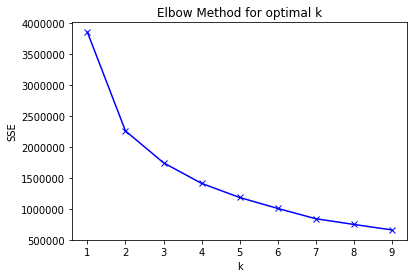

In [36]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
print(pd.DataFrame(dict(k=ks,sse=sse)))

plt.plot(ks,sse,'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method for optimal k')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
kmeans.predict(X)

array([5, 1, 1, ..., 1, 4, 5], dtype=int32)

In [50]:
df['cluster'] = kmeans.predict(X)
df['cluster2'] = kmeans.predict(X)

In [51]:
df['cluster'] = 'Cluster' + df['cluster'].astype('str')

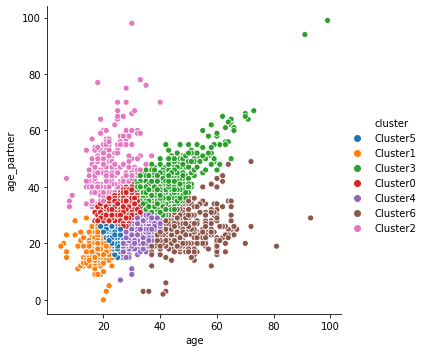

In [45]:
sns.relplot(data=df,x='age',y='age_partner',hue='cluster')

<IPython.core.display.Javascript object>


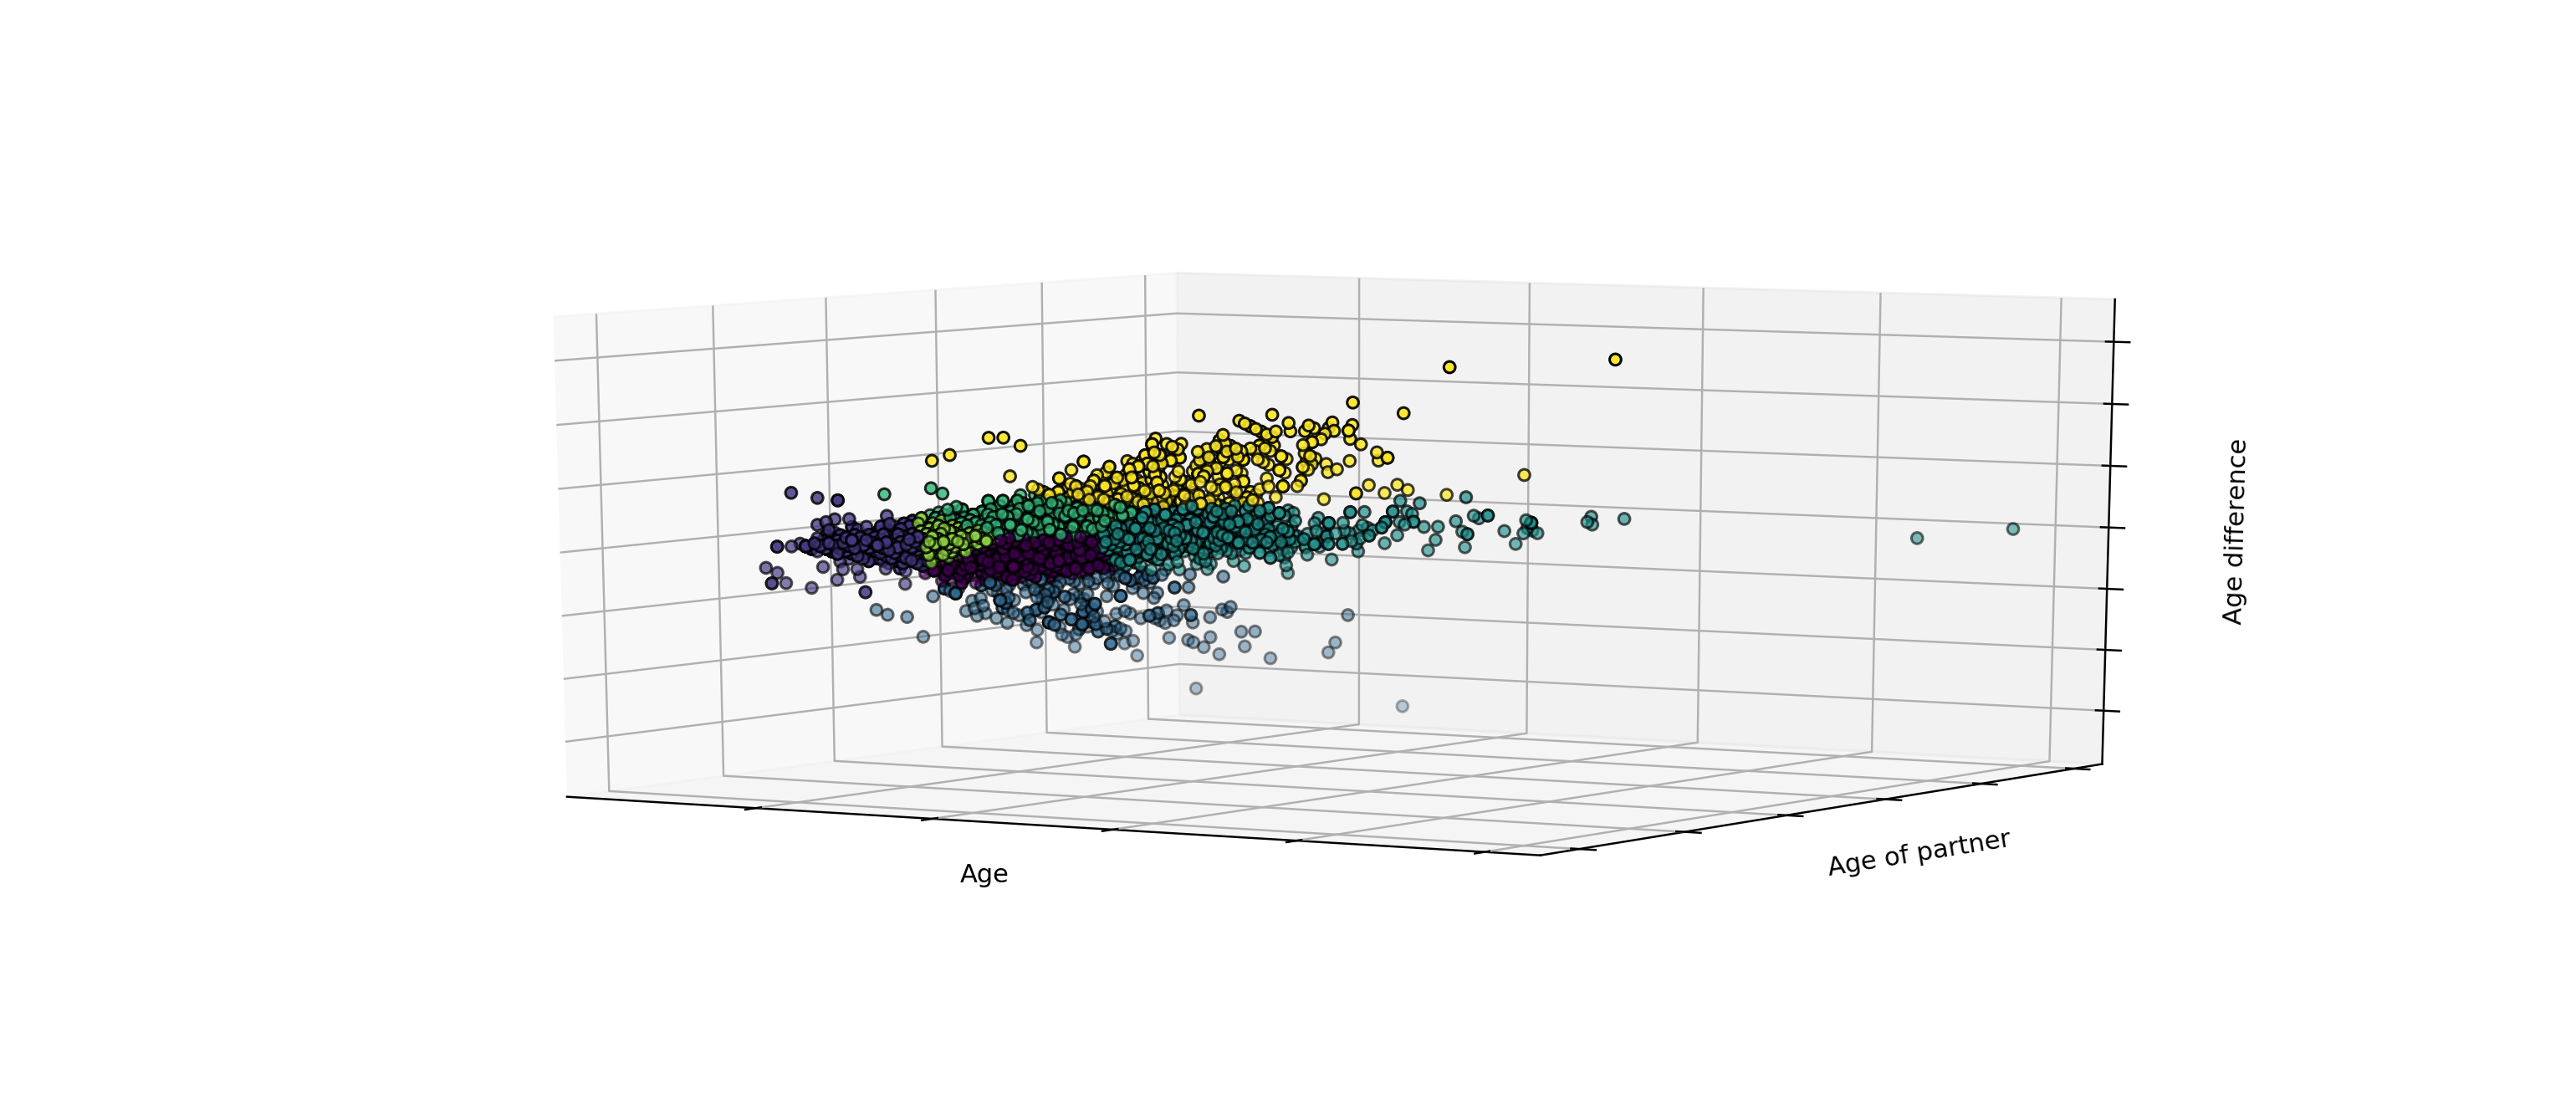

In [59]:
#df = df.drop(columns=['subject','id','cluster'])
fig, ax = plt.subplots(1, 1, figsize=(14, 6), subplot_kw={'projection': '3d'})
kmeans.fit(df)
#labels = kmeans.labels_
ax.scatter(df['age'],df['age_partner'],df['age_diff'],c=df.cluster2,edgecolor='k')
#ax.set(xticklabels=[],yticklabels=[],zticklabels=[])
ax.set(xlabel='Age',ylabel='Age of partner',zlabel='Age difference')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

In [53]:
df.head()

,age_partner,age,id,subject,age_diff,cluster,cluster2
0,24,25,3iwivb,I'm [25/M] having issues with my GF [24/F] Fac...,1,Cluster5,5
1,18,20,3iwrcd,I [20M] asked a friend [18F] to the movies. Di...,2,Cluster1,1
2,17,16,3iwucq,Me (16/M) not sure if co-worker (17/F) is bein...,-1,Cluster1,1
3,17,16,3iwx0l,Me [16/M] Not sure if my co-worker [17/F] is b...,-1,Cluster1,1
4,26,22,3iwx5t,Me [22/M] and my GF [26/F] having been seeing ...,-4,Cluster5,5


<IPython.core.display.Javascript object>


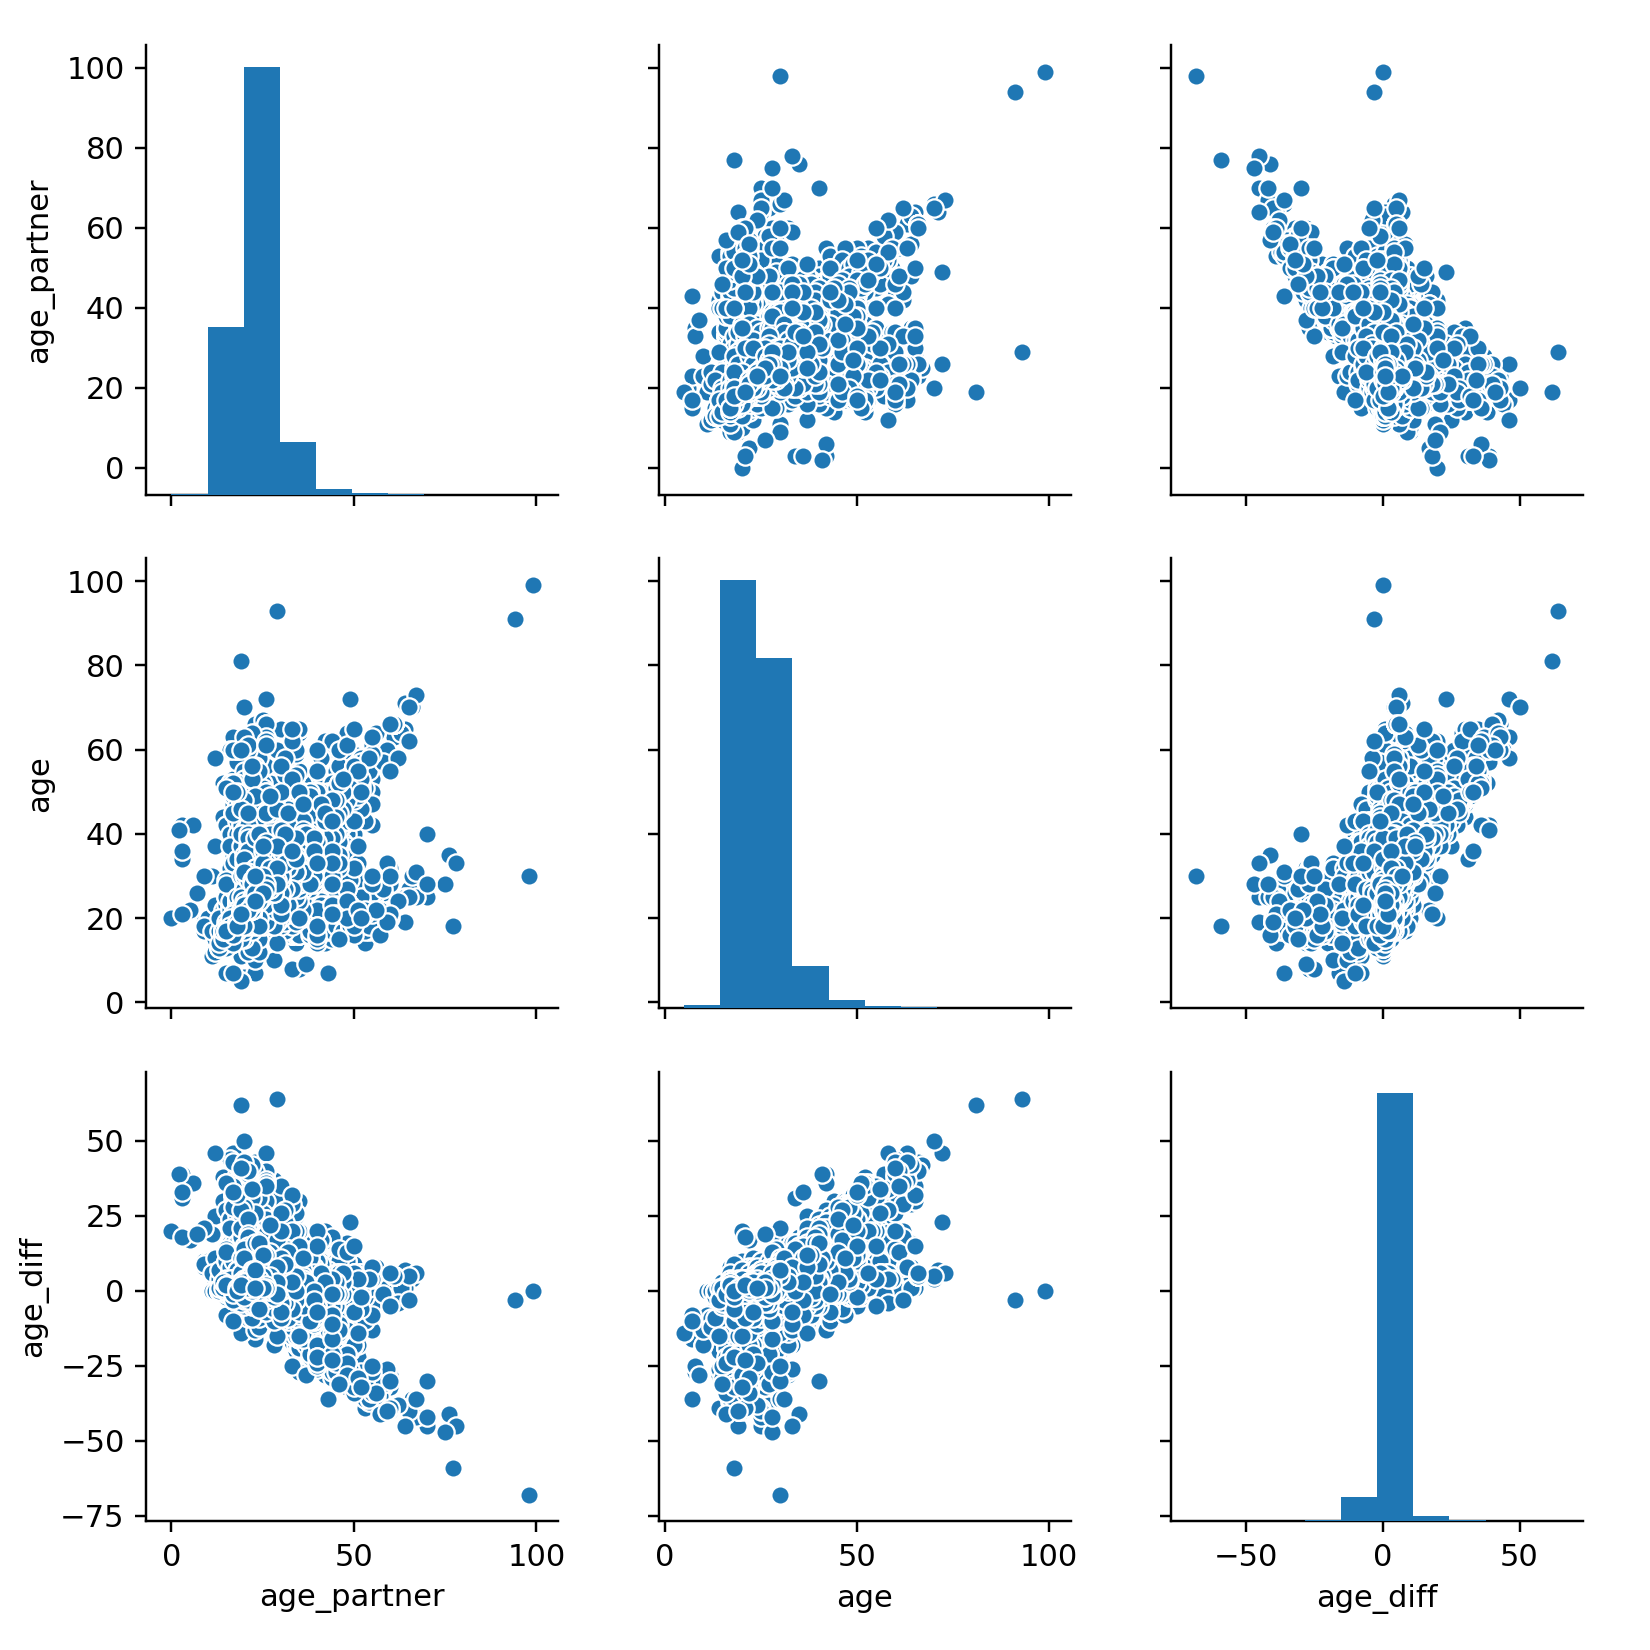

In [60]:
sns.pairplot(X)

In [ ]:
df